# PASSION demo part 1/3:
## Satellite data generation

In this notebook, the input satellite dataset is generated in two ways:  
    - A mock small region is generated by specifying a bounding box.  
    - A full dataset of the region of Aachen is generated with a shapefile.   

In [1]:
import passion

Segmentation Models: using `keras` framework.
Error while importing RESKit. Package is not available in Windows. Continuing with the rest of submodules...


The output path of the satellite imagery is specified (this should be changed to your hard drive).

In [2]:
from pathlib import Path
output_path = Path('F:\datasets/passion/satellite')

#### IMPORTANT: here, your private service API key must be specified

- For Bing Maps (**recommended**), create your developer account at:  
https://www.bingmapsportal.com/

- For Google Maps, create your developer account at:  
https://developers.google.com/maps/documentation/maps-static/overview

In [3]:
API_KEY = 'YOUR_KEY'

Here, the dataset is generated with:
- Bounding box: in the latitude longitude limits ((50.77850739604879, 6.0768084397936395), (50.77214558009357, 6.091035433169415)).
- Zoom level 19: usually it is the most common largest value for urban areas.
- Bing Maps API service.

In [4]:
passion.satellite.image_retrieval.generate_dataset(API_KEY, 'bing', output_path, zoom = 19, bbox=((50.77850739604879, 6.0768084397936395), (50.77214558009357, 6.091035433169415)))

Trying zoom level: 19
Map pixels from	(69374462,45063984)
To	(69379767,45067735)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:23<00:00,  2.56s/it]


In [5]:
output_path = Path('F:\datasets/passion/full_aachen')

Here, the dataset is generated with:
- Shapefile: in the specified path, shapefiles can be found with the administrative boundaries of Aachen.
- Zoom level 19: usually it is the most common largest value for urban areas.
- Bing Maps API service.

**NOTE**  
This is a large dataset of the full municipality of Aachen, with approximatelly 1700 images. Therefore, this will be a long process, lasting 2h 21min in a test.

In [6]:
import shapefile
# Path to the shapefile of a region, in this case of the region of Aachen
# The files .shp, .shx, .prj and .dbf should be included with the same name
sf_path = Path('F:\datasets/passion/aachen_shapefile/aachen')
sf = shapefile.Reader(str(sf_path))
shape = sf.shapes()[0]

passion.satellite.image_retrieval.generate_dataset(API_KEY, 'bing', output_path, zoom = 19, shapefile = shape)

Trying zoom level: 19
Map pixels from	(69336454,45017520)
To	(69427130,45132513)


3588it [2:21:15,  2.36s/it]                                                                                                                                                                                       


###### Sample Image:

The generated dataset is composed of 2000x1475 pixel images, specifying the image center in the filename following a format that adapted ISO 6709 into file characters.

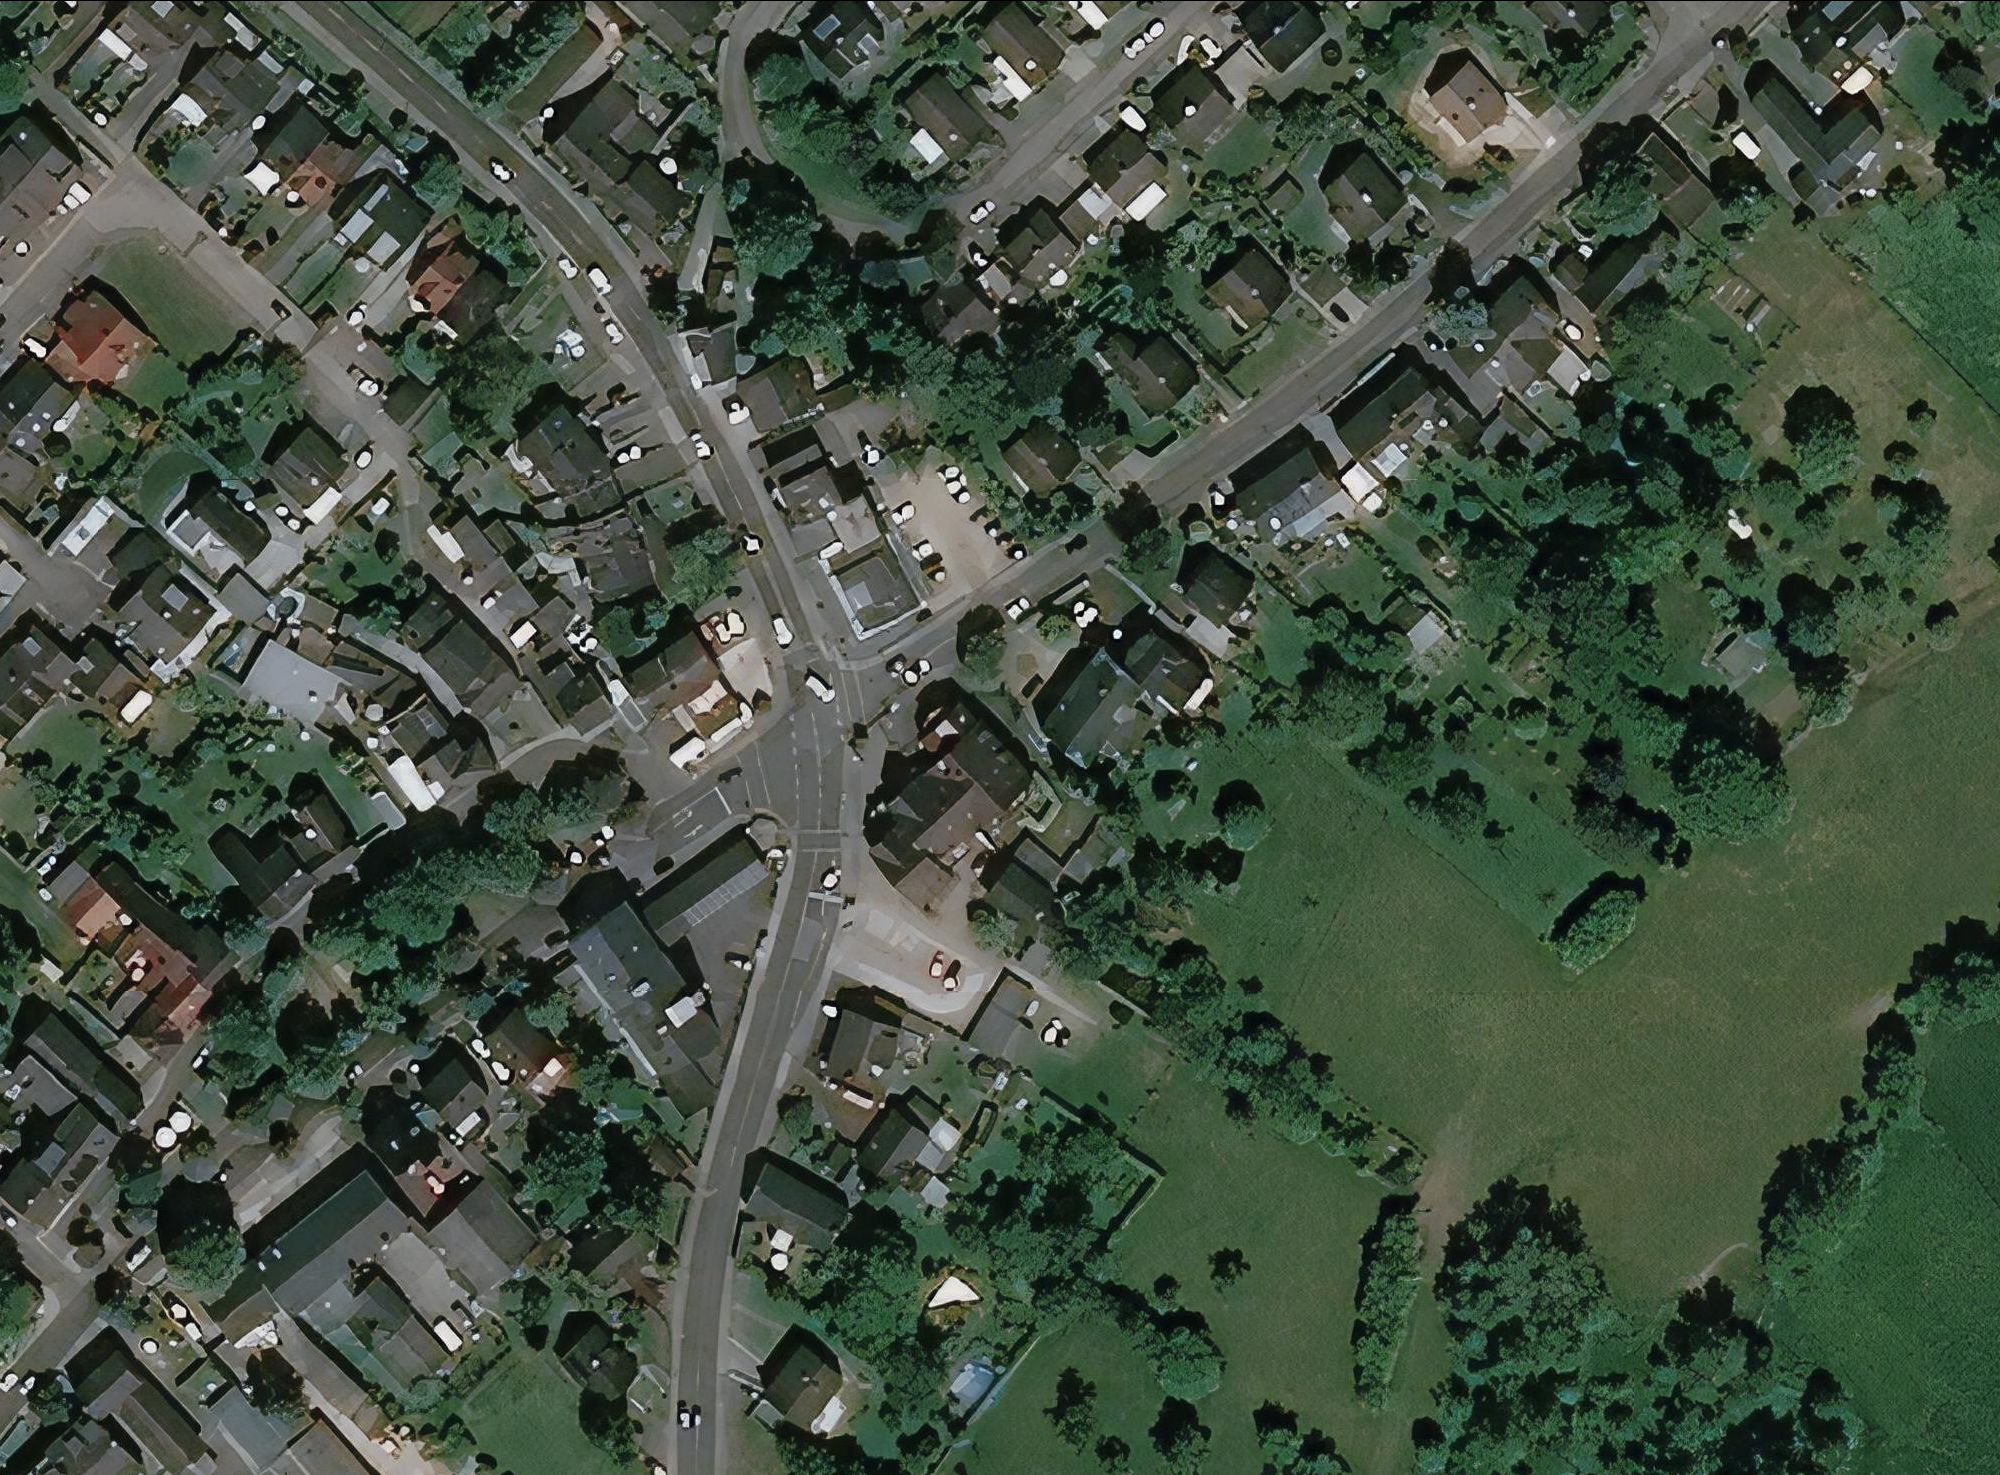

In [16]:
import PIL

paths = list(output_path.glob('*.png'))
img = PIL.Image.open(paths[342])

img